# Árvore de decisão

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos dados

In [2]:
df = pd.read_csv('dt.csv')
df

,Age,NumOfProducts,IsActiveMember,Exited
0,42,1,1,1
1,41,1,1,0
2,42,3,0,1
3,39,2,0,0
4,43,1,1,0
...,...,...,...,...
9995,39,2,0,0
9996,35,1,1,0
9997,36,1,1,1
9998,42,2,0,1


# Separação em variáveis preditivas e variável resposta

In [3]:
X = df.drop('Exited',axis=1)
y = df.Exited

X

,Age,NumOfProducts,IsActiveMember
0,42,1,1
1,41,1,1
2,42,3,0
3,39,2,0
4,43,1,1
...,...,...,...
9995,39,2,0
9996,35,1,1
9997,36,1,1
9998,42,2,0


In [4]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Análises preliminares

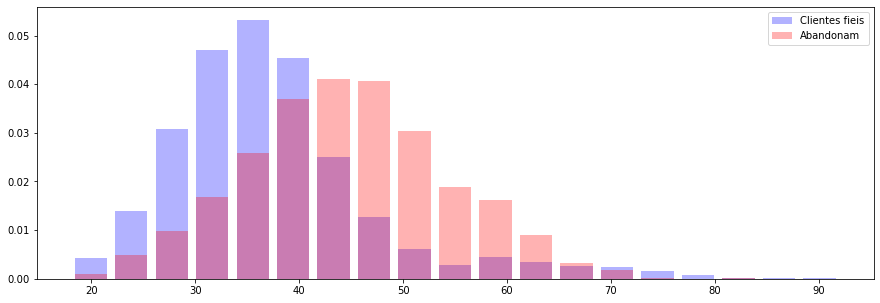

In [11]:
mi = X.Age.min()
ma = X.Age.max()

bins = np.linspace(mi,ma,20)

plt.figure(figsize=(15,5))
plt.hist( X.loc[y==0].Age, rwidth=0.80, bins=bins, color='b', alpha=.3, density=True, label='Clientes fieis' )
plt.hist( X.loc[y==1].Age, rwidth=0.80, bins=bins, color='r', alpha=.3, density=True, label='Abandonam' )

plt.legend()

In [14]:
y.mean()

0.2037

In [12]:
y.loc[ X.Age>=40 ].mean()

0.3588337901819088

In [15]:
y.loc[ X.Age<40 ].mean()

0.09971605144479706

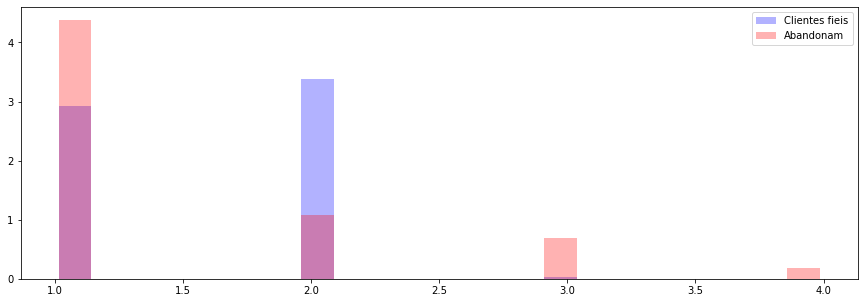

In [17]:
mi = X.NumOfProducts.min()
ma = X.NumOfProducts.max()

bins = np.linspace(mi,ma,20)

plt.figure(figsize=(15,5))
plt.hist( X.loc[y==0].NumOfProducts, rwidth=0.80, bins=bins, color='b', alpha=.3, density=True, label='Clientes fieis' )
plt.hist( X.loc[y==1].NumOfProducts, rwidth=0.80, bins=bins, color='r', alpha=.3, density=True, label='Abandonam' )

plt.legend()

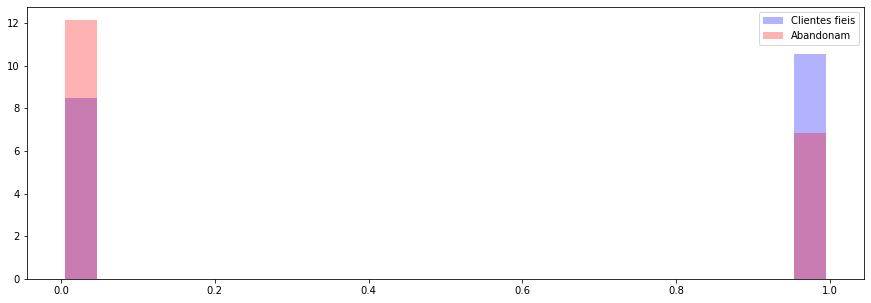

In [18]:
mi = X.IsActiveMember.min()
ma = X.IsActiveMember.max()

bins = np.linspace(mi,ma,20)

plt.figure(figsize=(15,5))
plt.hist( X.loc[y==0].IsActiveMember, rwidth=0.80, bins=bins, color='b', alpha=.3, density=True, label='Clientes fieis' )
plt.hist( X.loc[y==1].IsActiveMember, rwidth=0.80, bins=bins, color='r', alpha=.3, density=True, label='Abandonam' )

plt.legend()

# Divisão em conjunto treino e conjunto teste

# Esses dados não tem uma coluna de TEMPO

# Então faremos uma validação out-of-sample

In [19]:
import sklearn
sklearn.__version__

'0.24.0'

In [21]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.30, random_state=61658)

In [22]:
X_tr

,Age,NumOfProducts,IsActiveMember
9057,33,2,1
81,32,1,0
3433,37,1,0
1768,28,2,0
1888,60,2,1
...,...,...,...
4368,33,1,0
9637,31,1,1
8675,54,1,0
8806,38,2,1


In [23]:
X_ts

,Age,NumOfProducts,IsActiveMember
2184,40,2,0
1795,35,1,1
2175,34,2,0
9004,33,2,0
3484,28,2,1
...,...,...,...
8441,23,2,0
9524,38,1,0
1685,20,1,0
5946,32,2,0


# Definição dos parâmetros de VALIDAÇÃO CRUZADA

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': [4,8,16,32,64,128,256,512,1024,2048],
    'criterion': ['gini','entropy'],
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=61658), #Primeiro arg: Modelo
    params,                                     #Segundo arg: Parâmetros
    cv=10,                                      #Arg `cv`: Qtd de folds
    scoring='roc_auc',                          #Arg `scoring`: Métrica
    verbose=5, #Arg `verbose`: Mostra na tela
)

In [25]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

# Encontrar o melhor modelo nos dados de TREINO por validação cruzada

In [26]:
grid.fit(X_tr,y_tr)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.1s
[CV 2/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 3/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 4/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 5/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.1s
[CV 6/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 7/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 8/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 9/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 10/10] END .............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 1/10] END ..............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 2/10] END ..............criterion=gini, ma

[CV 5/10] END ...........criterion=entropy, max_leaf_nodes=4; total time=   0.1s
[CV 6/10] END ...........criterion=entropy, max_leaf_nodes=4; total time=   0.0s
[CV 7/10] END ...........criterion=entropy, max_leaf_nodes=4; total time=   0.0s
[CV 8/10] END ...........criterion=entropy, max_leaf_nodes=4; total time=   0.1s
[CV 9/10] END ...........criterion=entropy, max_leaf_nodes=4; total time=   0.1s
[CV 10/10] END ..........criterion=entropy, max_leaf_nodes=4; total time=   0.0s
[CV 1/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 2/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 3/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 4/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 5/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 6/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 7/10] END ...........cri

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

# Qual foi o melhor parâmetro/modelo?

In [27]:
grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 32}

# Qual foi o melhor score médio?

In [28]:
grid.best_score_

0.8275774006882053

# Vamos usar o modelo no conjunto TESTE pra ver se está bom

In [30]:
y_pred = grid.predict_proba(X_ts)[:,1]
y_pred

array([0.07399577, 0.13777778, 0.03446502, ..., 0.13544018, 0.03446502,
       0.03446502])

# Curva ROC

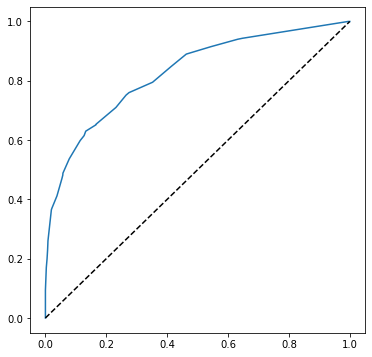

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_ts, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot((0,1),(0,1),'k--')

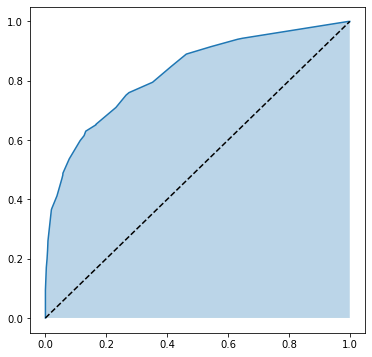

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_ts, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr,alpha=.3)
plt.plot((0,1),(0,1),'k--')

# ROC/AUC score

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_ts, y_pred)

0.8266989583333333

In [37]:
grid.best_score_

0.8275774006882053

# E se tivesse feito no treino?

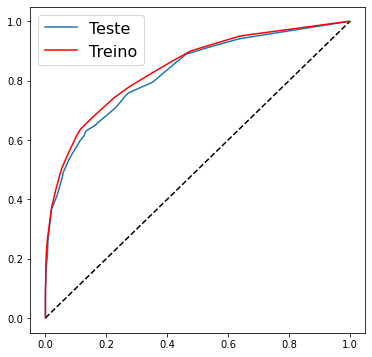

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_ts, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr,label='Teste')
plt.plot((0,1),(0,1),'k--')

fpr2, tpr2, ths2 = roc_curve(y_tr, grid.predict_proba(X_tr)[:,1])

plt.plot(fpr2, tpr2, label='Treino',color='r')

plt.legend(fontsize=16)

# Visualização da árvore

In [39]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

In [40]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=32,
                       random_state=61658)

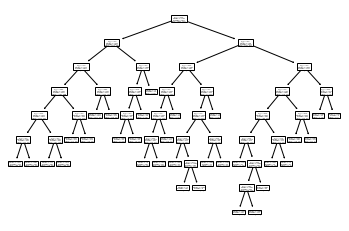

In [42]:
from sklearn.tree import plot_tree

plot_tree(grid.best_estimator_);

In [45]:
X_tr

,Age,NumOfProducts,IsActiveMember
9057,33,2,1
81,32,1,0
3433,37,1,0
1768,28,2,0
1888,60,2,1
...,...,...,...
4368,33,1,0
9637,31,1,1
8675,54,1,0
8806,38,2,1


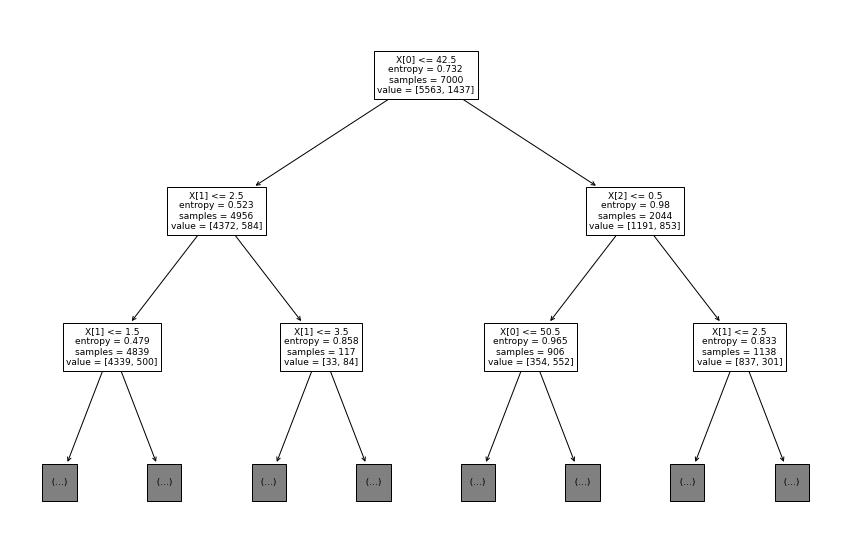

In [44]:
plt.figure(figsize=(15,10))
plot_tree(grid.best_estimator_, max_depth=2);

In [46]:
X_tr.columns

Index(['Age', 'NumOfProducts', 'IsActiveMember'], dtype='object')

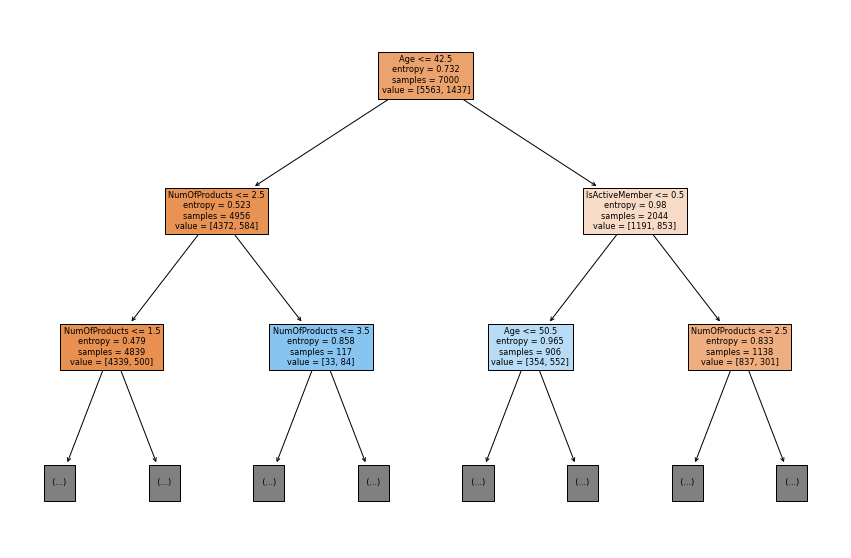

In [47]:
plt.figure(figsize=(15,10))
plot_tree(grid.best_estimator_, max_depth=2,
          feature_names=X_tr.columns, filled=True,
         );